In [68]:
import pandas as pd 
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 


In [56]:
# chargement des données
df = pd.read_csv("../../../DataGeneration/df_features.csv")
df.head()

,Unnamed: 0,etiquette,montant_operation,montant_banque,presence_num_ref,similarite_cos,delai_jours,delai_absolu,dans_fenetre_valide,montant_ratio,...,categorie_fournitures_bureau,categorie_frais_bancaires,categorie_juridique_conformité,categorie_licences_logicielles,categorie_maintenance,categorie_marketing,categorie_outils_rh,categorie_services_cloud,categorie_services_publiques,categorie_équipement
0,0,1,448.85,988.89,True,0.315020,5,5,True,0.453893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,186.47,685.81,True,0.347944,65,65,True,0.271897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,518.18,518.18,True,0.277123,1,1,True,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,534.96,534.96,True,0.431332,0,0,True,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,524.38,524.38,True,0.225302,2,2,True,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# definition de la colonne cible
target_col ="etiquette"
X = df.drop(columns=[target_col,"Unnamed: 0"], errors='ignore')
y = df[target_col]

In [58]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
#creation du modèle
nb_model = GaussianNB()

In [60]:
# Définir le modèle et la grille d'hyperparamètres 
gnb = GaussianNB()
param_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

In [61]:
#Grid Search avec validation croisée
grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring="accuracy",
    n_jobs=-1
)


In [62]:
#Entrainement
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]},
             scoring='accuracy')

In [63]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [64]:
print(grid_search.best_params_)

{'var_smoothing': 1e-09}


Accuracy : 0.9552936775158998

 Rapport de classification: 
                precision    recall  f1-score   support

           0       0.97      0.94      0.95      2455
           1       0.95      0.97      0.96      2891

    accuracy                           0.96      5346
   macro avg       0.96      0.95      0.95      5346
weighted avg       0.96      0.96      0.96      5346



<Axes: >

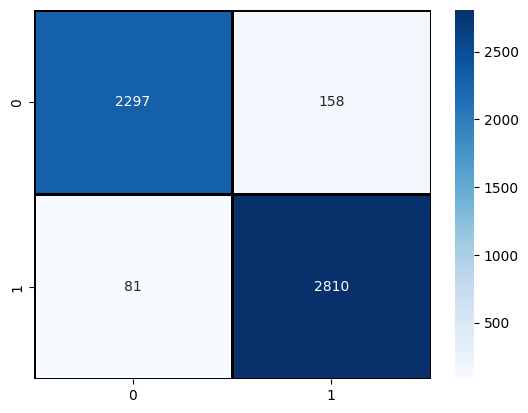

In [69]:
# Evaluation 
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\n Rapport de classification: \n " , classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

In [70]:
joblib.dump(best_model,"gaussian_nb.pkl")

['gaussian_nb.pkl']